In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [ ]:
data = pd.read_csv("IMDB-Movie-Data.csv")
data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


Most common words in movie titles: [('the', 305), ('of', 92), (':', 85), ("'s", 29), ('a', 29), ('and', 22), ('in', 22), ('2', 22), ('man', 13), ('to', 12)]


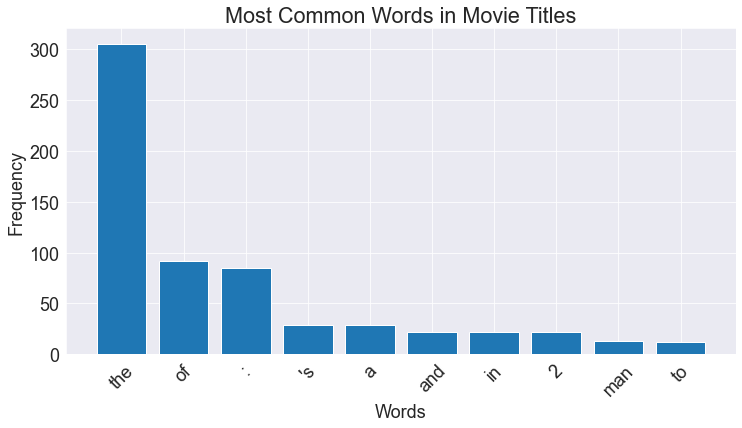

In [ ]:
nltk.download('punkt', quiet=True)

#Most common words used in movie titles
titles = data['Title'].tolist()
words = []

for title in titles:
    tokens = nltk.word_tokenize(title.lower())
    words.extend(tokens)

word_counts = Counter(words)

common_words = word_counts.most_common(10)
print("Most common words in movie titles:", common_words)

plt.figure(figsize=(12, 6))
plt.bar(*zip(*common_words))
plt.title("Most Common Words in Movie Titles")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Average length of movie titles
title_lengths = [len(title.split()) for title in titles]
avg_length_words = sum(title_lengths) / len(title_lengths)

avg_length_chars = sum(len(title) for title in titles) / len(titles)

print(f"Average length of movie titles (in words): {avg_length_words:.2f}")
print(f"Average length of movie titles (in characters): {avg_length_chars:.2f}")

Average length of movie titles (in words): 2.60
Average length of movie titles (in characters): 14.54


In [ ]:
#Identify duplicate titles
duplicate_titles = data[data.duplicated(subset='Title', keep=False)]

print("Duplicate Titles:")
print(duplicate_titles[['Title', 'Rank']])

Duplicate Titles:
        Title  Rank
239  The Host   240
632  The Host   633


In [ ]:
if data['Genre'].isnull().any():
    data = data.dropna(subset=['Genre'])


Most frequent genres: [('Drama', 513), ('Action', 303), ('Comedy', 279), ('Adventure', 259), ('Thriller', 195), ('Crime', 150), ('Romance', 141), ('Sci-Fi', 120), ('Horror', 119), ('Mystery', 106)]


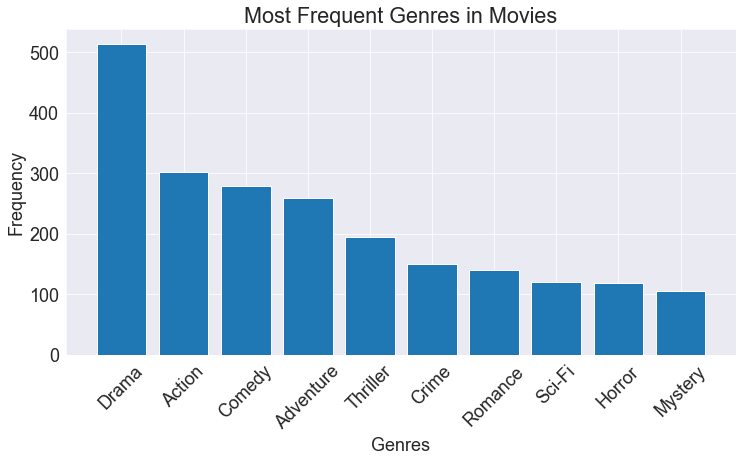

In [ ]:
#Most frequent genres
genre_list = [genre.strip() for sublist in data['Genre'].str.split(',') for genre in sublist]
genre_counts = Counter(genre_list)

common_genres = genre_counts.most_common(10)
print("Most frequent genres:", common_genres)

plt.figure(figsize=(12, 6))
plt.bar(*zip(*common_genres))
plt.title("Most Frequent Genres in Movies")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from itertools import combinations
from collections import Counter

#Most common combinations of genres

combinations_list = []

for genres in data['Genre']:
    split_genres = genres.split(',')
    for r in range(2, len(split_genres) + 1):
        combinations_list.extend(combinations(map(str.strip, split_genres), r))
combination_counts = Counter(combinations_list)

common_combinations = combination_counts.most_common(5)
print("Most common genre combinations:", common_combinations)

Most common genre combinations: [(('Action', 'Adventure'), 155), (('Comedy', 'Drama'), 100), (('Drama', 'Romance'), 98), (('Crime', 'Drama'), 97), (('Drama', 'Thriller'), 80)]


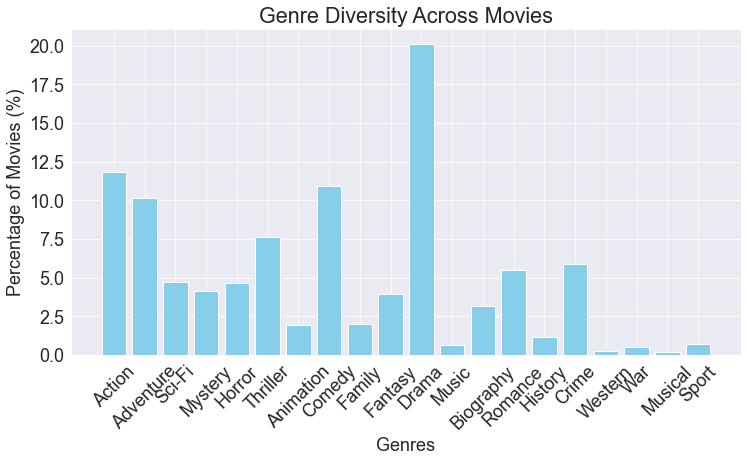

In [ ]:
#Genre diversity visualization
diversity_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

diversity_df['Percentage'] = (diversity_df['Count'] / diversity_df['Count'].sum()) * 100

plt.figure(figsize=(12, 6))
plt.bar(diversity_df['Genre'], diversity_df['Percentage'], color='skyblue')
plt.title("Genre Diversity Across Movies")
plt.xlabel("Genres")
plt.ylabel("Percentage of Movies (%)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Average length of movie descriptions
if 'Description' in data.columns:
    data['Description_Length'] = data['Description'].str.split().str.len()

    avg_length = data['Description_Length'].mean()
    print("Average length of movie descriptions (in words):", avg_length)
else:
    print("No 'Description' column in the dataset.")

Average length of movie descriptions (in words): 27.921


Most frequently used words in descriptions: [('a', 1640), ('the', 1364), ('to', 938), ('of', 814), ('and', 721), ('in', 580), ('his', 487), ('an', 304), ('is', 296), ('with', 274)]


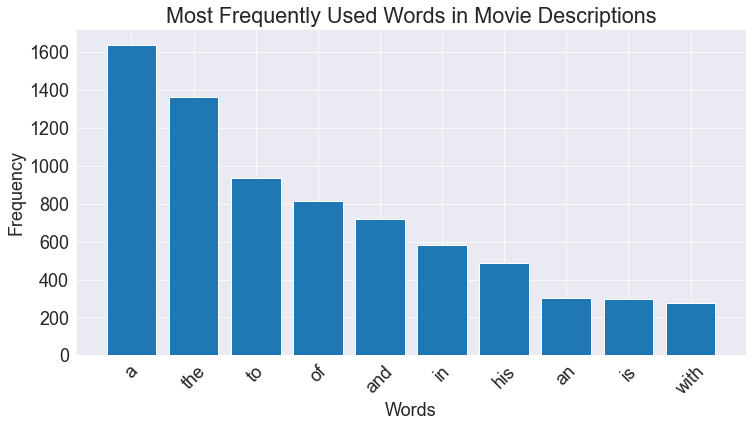

In [ ]:
#Most frequently used words in descriptions
if 'Description' in data.columns:
    descriptions_combined = ' '.join(data['Description'].dropna())
    words = re.findall(r'\b\w+\b', descriptions_combined.lower())  # Tokenize by words
    word_counts = Counter(words)

    common_words = word_counts.most_common(10)
    print("Most frequently used words in descriptions:", common_words)

    plt.figure(figsize=(12, 6))
    plt.bar(*zip(*common_words))
    plt.title("Most Frequently Used Words in Movie Descriptions")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#Check for null or missing descriptions
missing_count = data['Description'].isnull().sum()
print("Number of missing or null descriptions:", missing_count)

Number of missing or null descriptions: 0


In [ ]:
#Keyword analysis for identifying genres or ratings
keywords_genre = {
    "action": ["fight", "battle", "war", "hero"],
    "comedy": ["funny", "laugh", "humor", "joke"],
    "drama": ["love", "family", "relationship", "tragedy"],
    "horror": ["scary", "fear", "ghost", "murder"],
    "romance": ["love", "romantic", "couple", "relationship"]
}

def find_keywords_in_description(description):
    presence = {}
    if pd.isnull(description):
        return presence
    description_lower = description.lower()
    for genre, keywords in keywords_genre.items():
        presence[genre] = any(keyword in description_lower for keyword in keywords)
    return presence

data['Keyword_Presence'] = data['Description'].apply(find_keywords_in_description)

sample_results = data[['Description', 'Keyword_Presence']].head(10)
print("Sample keyword presence results:")
print(sample_results)

Sample keyword presence results:
                                         Description  \
0  A group of intergalactic criminals are forced ...   
1  Following clues to the origin of mankind, a te...   
2  Three girls are kidnapped by a man with a diag...   
3  In a city of humanoid animals, a hustling thea...   
4  A secret government agency recruits some of th...   
5  European mercenaries searching for black powde...   
6  A jazz pianist falls for an aspiring actress i...   
7  A has-been actor best known for playing the ti...   
8  A true-life drama, centering on British explor...   
9  A spacecraft traveling to a distant colony pla...   

                                    Keyword_Presence  
0  {'action': True, 'comedy': False, 'drama': Fal...  
1  {'action': False, 'comedy': False, 'drama': Fa...  
2  {'action': False, 'comedy': False, 'drama': Fa...  
3  {'action': False, 'comedy': False, 'drama': Fa...  
4  {'action': False, 'comedy': False, 'drama': Fa...  
5  {'action': False,

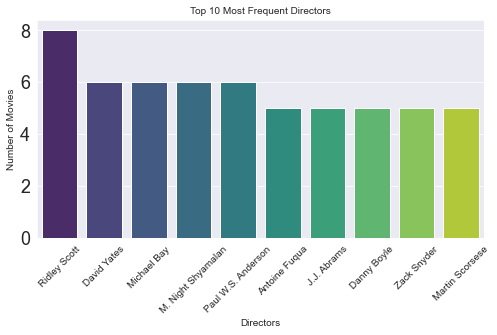

In [ ]:
director_counts = data['Director'].value_counts()
plt.figure(figsize=(8 , 4))
sns.barplot(x=director_counts.head(10).index, y=director_counts.head(10).values, palette='viridis')
plt.title('Top 10 Most Frequent Directors',fontsize=10)
plt.xlabel('Directors', fontsize=10)
plt.ylabel('Number of Movies' , fontsize=10)
plt.xticks(rotation=45 , fontsize=10)
plt.show()

In [ ]:
# Association between directors and specific genres or ratings
if 'Genre' in data.columns and 'Rating' in data.columns:
    data['Genre'] = data['Genre'].str.split(',')
    data_exploded = data.explode('Genre')

    director_genre_counts = data_exploded.groupby(['Director', 'Genre']).size().reset_index(name='Counts')

    print("\nDirector and Genre associations:")
    print(director_genre_counts.groupby('Director').agg({'Counts': 'sum'}).sort_values(by='Counts', ascending=False).head(10))

    avg_rating_by_director = data.groupby('Director')['Rating'].mean().reset_index()

    print("\nAverage Ratings by Directors:")
    print(avg_rating_by_director.sort_values(by='Rating', ascending=False).head(10))


Director and Genre associations:
                    Counts
Director                  
Ridley Scott            24
Michael Bay             18
Paul W.S. Anderson      18
David Yates             18
M. Night Shyamalan      16
Justin Lin              15
J.J. Abrams             15
Peter Berg              15
Christopher Nolan       14
Zack Snyder             14

Average Ratings by Directors:
                             Director  Rating
465                     Nitesh Tiwari    8.80
108                 Christopher Nolan    8.68
392                    Makoto Shinkai    8.60
470                   Olivier Nakache    8.60
194  Florian Henckel von Donnersmarck    8.50
0                          Aamir Khan    8.50
122                   Damien Chazelle    8.40
452                      Naoko Yamada    8.40
508                   Rajkumar Hirani    8.30
377                       Lee Unkrich    8.30


In [ ]:
#Directors with multiple movies in the same year
if 'Year' in data.columns:

    directors_per_year = data.groupby(['Director', 'Year']).size().reset_index(name='Movie_Count')

    multiple_movies_per_year = directors_per_year[directors_per_year['Movie_Count'] > 1]

    print("\nDirectors with multiple movies in the same year:")
    print(multiple_movies_per_year)


Directors with multiple movies in the same year:
                Director  Year  Movie_Count
159       Clint Eastwood  2008            2
231          David Yates  2016            2
236     Denis Villeneuve  2013            2
367          Henry Joost  2016            2
430         Jeff Nichols  2016            2
555       Lars von Trier  2013            2
664        Mike Flanagan  2016            3
689     Nicholas Stoller  2016            2
745           Peter Berg  2016            2
756            Phil Lord  2014            2
779  Richard LaGravenese  2007            2
802     Robert Rodriguez  2007            2


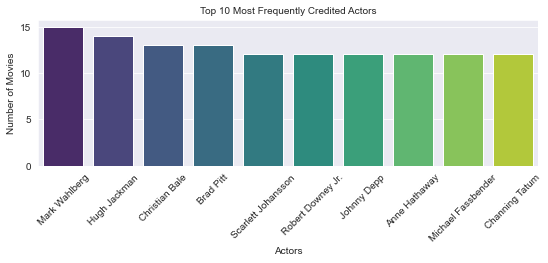

In [ ]:
#Most frequently credited actors
data['Actors'] = data['Actors'].astype(str)
actor_counts = data['Actors'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(8, 4))  # Adjust size as necessary
sns.barplot(x=actor_counts.head(10).index, y=actor_counts.head(10).values, palette='viridis')

# Decrease font size for better readability
plt.title('Top 10 Most Frequently Credited Actors', fontsize=10)
plt.xlabel('Actors', fontsize=10)
plt.ylabel('Number of Movies', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()  # Adjust layout to fit the figure area
plt.show()

In [ ]:
#Actors Who Appear Together Often in Multiple Movies
import itertools
from collections import Counter

actor_pairs = []
for actors in data['Actors'].dropna():
    actors_list = [actor.strip() for actor in actors.split(',')]
    pairs = itertools.combinations(sorted(actors_list), 2)
    actor_pairs.extend(pairs)

pair_counts = Counter(actor_pairs)
print("\nTop 10 actor pairs who appear together often:")
print(pair_counts.most_common(10))


Top 10 actor pairs who appear together often:
[(('Paul Walker', 'Vin Diesel'), 4), (('Daniel Radcliffe', 'Emma Watson'), 4), (('Daniel Radcliffe', 'Rupert Grint'), 4), (('Emma Watson', 'Rupert Grint'), 4), (('Jennifer Lawrence', 'Josh Hutcherson'), 4), (('Jennifer Lawrence', 'Liam Hemsworth'), 4), (('Josh Hutcherson', 'Liam Hemsworth'), 4), (('Kristen Stewart', 'Robert Pattinson'), 4), (('Helena Bonham Carter', 'Johnny Depp'), 4), (('Adam Sandler', 'Kevin James'), 4)]


In [ ]:
#Actors are associated with specific genres or ratings
data['Genre'] = data['Genre'].astype(str)

data['Actors'] = data['Actors'].replace('', None).str.split(',')
data['Genre'] = data['Genre'].replace('', None).str.split(',')

data_exploded = data.explode('Actors').explode('Genre').rename(columns={'Actors': 'Actor', 'Genre': 'Genre'})

actor_genre_counts = data_exploded.groupby(['Actor', 'Genre']).size().reset_index(name='Counts')

print("\nActor and Genre associations:")
top_genre_associations = actor_genre_counts.groupby('Actor')['Counts'].sum().reset_index().sort_values(by='Counts', ascending=False).head(10)
print(top_genre_associations)

avg_rating_by_actor = data_exploded.groupby('Actor')['Rating'].mean().reset_index()
print("\nAverage Ratings by Actors:")
print(avg_rating_by_actor.sort_values(by='Rating', ascending=False).head(10))


Actor and Genre associations:
                  Actor  Counts
2108      Mark Wahlberg      31
1747     Christian Bale      30
1572    Woody Harrelson      25
1927    Jake Gyllenhaal      24
574        Hugh Jackman      24
1697          Brad Pitt      24
2380         Will Smith      24
2060  Leonardo DiCaprio      24
1991        Johnny Depp      24
1125     Morgan Freeman      23

Average Ratings by Actors:
                    Actor  Rating
497    Fatima Sana Shaikh     8.8
2275       Sanya Malhotra     8.8
1344        Sakshi Tanwar     8.8
111            Anne Le Ny     8.6
1122   Mone Kamishiraishi     8.6
1870      François Cluzet     8.6
985         Mackenzie Foy     8.6
2261     Ryûnosuke Kamiki     8.6
1190              Omar Sy     8.6
1341           Ryô Narita     8.6
